In [132]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, decomposition


In [133]:
accounts = pd.read_csv('Data/twm_accounts.csv',sep=';')
customers = pd.read_csv('Data/twm_customer.csv',sep=';')
transactions = pd.read_csv('Data/twm_transactions.csv',sep=';')

In [134]:
accounts

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28
...,...,...,...,...,...,...,...,...
1404,4561143213625560,1362556,CC,N,20.1.1992,19.8.1995,1433.94,20.00
1405,4561143213626240,1362624,CC,Y,29.11.1990,NaN,632.75,1400.00
1406,4561143213628750,1362875,CC,Y,24.2.1989,NaN,2810.91,3000.00
1407,13626543,1362654,SV,Y,17.10.1992,NaN,784.53,622.46


In [136]:
transactions

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ
...,...,...,...,...,...,...,...,...,...,...
77575,77,13631752,-95.71,-95.71,0.0,95.71,14.2.1995,161001,A,TR
77576,94,13626772,-93.90,-93.90,0.0,824.36,11.3.1995,0,P,WD
77577,42,13625262,-10.35,-10.35,0.0,10.36,26.8.1995,0,P,WD
77578,98,13627052,-423.80,-423.80,0.0,162.28,13.6.1995,110209,E,WD


In [137]:
customers

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL


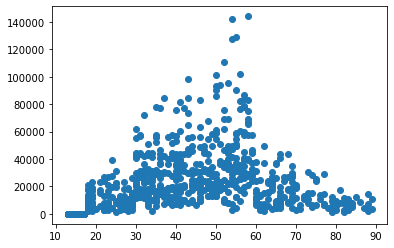

In [138]:
plt.scatter(customers.age,customers.income)

In [108]:
tran_codes = pd.get_dummies(transactions.tran_code)
tran_codes.columns = [ f'Code_{x}' for x in tran_codes.columns ]
channels = pd.get_dummies(transactions.channel)
channels.columns = [ f'Code_{x}' for x in channels.columns ]

In [120]:
one_hot = pd.merge(channels,tran_codes,left_index=True,right_index=True)

C:\Users\MATTST~1\AppData\Local\Temp/ipykernel_24404/2208045436.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col] / np.max(data[col])


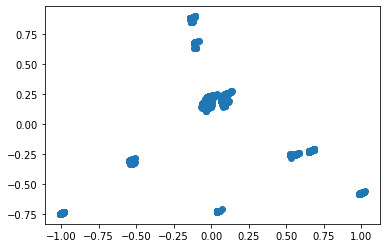

In [127]:
data = transactions[['tran_amt','principal_amt','interest_amt','new_balance']]

for col in data.columns:
    data[col] = data[col] / np.max(data[col])

data = pd.merge(data,one_hot,left_index=True,right_index=True)    

pca = decomposition.PCA(n_components=2)
pca.fit(data)
transformed = pca.transform(data)
var_percent = pca.explained_variance_ratio_ * 100

plt.scatter(transformed[:,0],transformed[:,1])

In [126]:
len(set(transactions.channel))

11

In [123]:
transactions

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ
...,...,...,...,...,...,...,...,...,...,...
77575,77,13631752,-95.71,-95.71,0.0,95.71,14.2.1995,161001,A,TR
77576,94,13626772,-93.90,-93.90,0.0,824.36,11.3.1995,0,P,WD
77577,42,13625262,-10.35,-10.35,0.0,10.36,26.8.1995,0,P,WD
77578,98,13627052,-423.80,-423.80,0.0,162.28,13.6.1995,110209,E,WD


In [97]:
accounts['acct_start_year'] = [ int(x.split('.')[-1]) for x in accounts.acct_start_date ]

In [98]:
accounts

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,acct_start_year
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58,1995
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15,1993
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00,1992
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46,1995
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28,1994
...,...,...,...,...,...,...,...,...,...
1404,4561143213625560,1362556,CC,N,20.1.1992,19.8.1995,1433.94,20.00,1992
1405,4561143213626240,1362624,CC,Y,29.11.1990,NaN,632.75,1400.00,1990
1406,4561143213628750,1362875,CC,Y,24.2.1989,NaN,2810.91,3000.00,1989
1407,13626543,1362654,SV,Y,17.10.1992,NaN,784.53,622.46,1992


C:\Users\MATTST~1\AppData\Local\Temp/ipykernel_24404/2966324782.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col] / np.max(data[col])


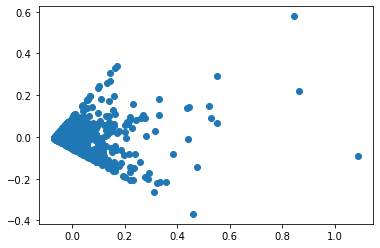

In [100]:
data = accounts[['starting_balance','ending_balance','acct_start_year']]

for col in data.columns:
    data[col] = data[col] / np.max(data[col])

pca = decomposition.PCA(n_components=2)
pca.fit(data)
transformed = pca.transform(data)
var_percent = pca.explained_variance_ratio_ * 100

plt.scatter(transformed[:,0],transformed[:,1])

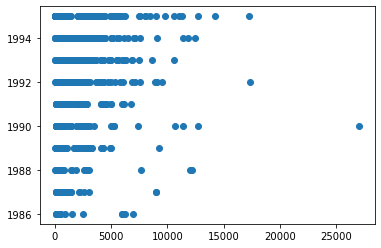

In [102]:
plt.scatter(accounts.starting_balance,accounts.acct_start_year)

In [88]:
transactions.columns

Index(['tran_id', 'acct_nbr', 'tran_amt', 'principal_amt', 'interest_amt',
       'new_balance', 'tran_date', 'tran_time', 'channel', 'tran_code'],
      dtype='object')

In [59]:
customers.gender.replace(['M ','F '],[0,1],inplace=True)

C:\Users\MATTST~1\AppData\Local\Temp/ipykernel_24404/3225768551.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col] / np.max(data[col])


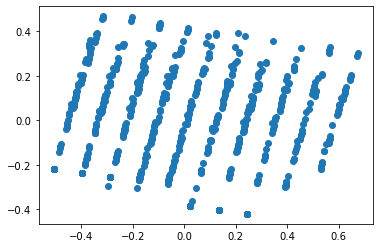

In [65]:
data = customers[['income','age','years_with_bank']]

for col in data.columns:
    data[col] = data[col] / np.max(data[col])

pca = decomposition.PCA(n_components=2)
pca.fit(data)
transformed = pca.transform(data)
var_percent = pca.explained_variance_ratio_ * 100

plt.scatter(transformed[:,0],transformed[:,1])

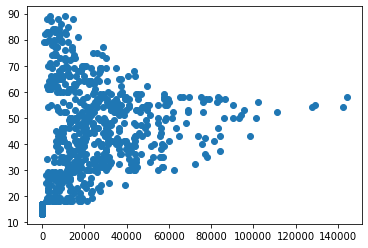

In [64]:
plt.scatter(customers.income,customers.age)

In [40]:
var_percent

array([9.99999285e+01, 6.97088776e-05])